In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

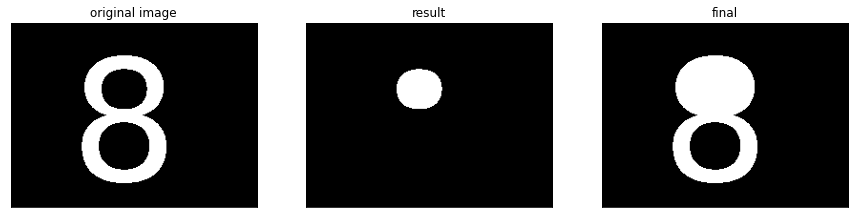

In [4]:
A = cv2.imread(filename="region.png", flags=cv2.IMREAD_GRAYSCALE)
thresh_val, A = cv2.threshold(src=A, thresh=100, maxval=255, type=cv2.THRESH_BINARY)
A = np.array(cv2.normalize(A.astype('uint8'), None, 0, 1, cv2.NORM_MINMAX))

# kernel
B = cv2.getStructuringElement(shape=cv2.MORPH_CROSS, ksize=(3,3))

P = [70,120]

# X_current means Xn
X_current = np.zeros(A.shape)

# X_last means Xn-1
# At first all the pixels of X_last are zero
# expect one pixel P
X_last = np.zeros(A.shape)
X_last[P[0],P[1]] = 1

X_current = np.uint8(cv2.dilate(X_last, B ,iterations = 1)) & (~A)

while np.any(X_current != X_last):
    X_last = X_current
    X_current = np.uint8(cv2.dilate(X_last, B ,iterations = 1)) & (~A)

result = X_current
final = result|A

fig, axes = plt.subplots(1,3, figsize=(15,8))
axes[0].imshow(A, cmap='gray')
axes[0].set_title("original image")

axes[1].imshow(result, 'gray')
axes[1].set_title("result")

axes[2].imshow(final, 'gray')
axes[2].set_title("final")

for ax in axes.ravel():
    ax.set_xticks([])
    ax.set_yticks([])

plt.show()
